In [1]:
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

env = gym.make('ma-highway-v0')


c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to proper

In [2]:
%matplotlib inline

In [7]:
from pprint import pprint
from tqdm.notebook import trange
import os

model = A2C.load('Training/Saved Models/best_model', env=env)
history = []
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    print("episode " + str(episode))
    step = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        positions = info["position_metrics"]
        history = info["speed_metrics"]
        #env.render('human')
        step += 1
env.close()
#print(history)
#print(positions)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:269: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


Test episodes:   0%|          | 0/1 [00:00<?, ?it/s]

episode 0


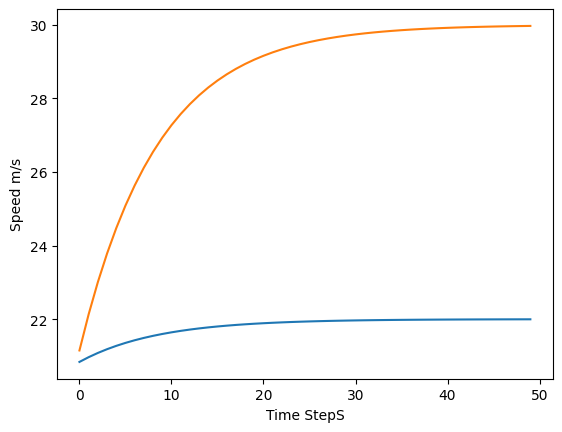

In [25]:
#Adjust this chart so the speed start from the same starting point

import numpy
history = numpy.array(history)
plt.plot(history[0:50,0], history[0:50,2:])
plt.xlabel("Time StepS")
plt.ylabel("Speed m/s")
plt.show()

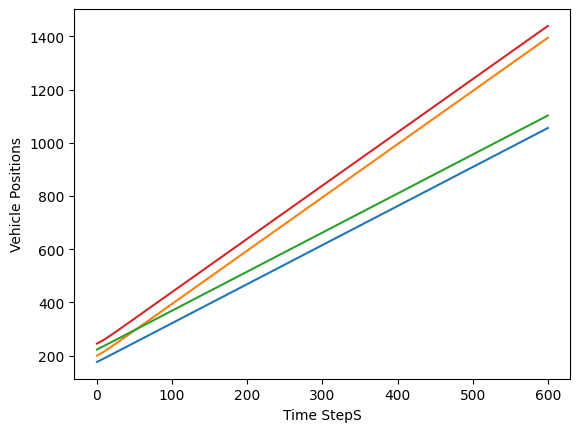

In [15]:
import numpy
positions = numpy.array(positions)
plt.plot(positions[:1001,0], positions[:,5:9])
plt.xlabel("Time Step")
plt.ylabel("Vehicle Positions")
plt.show()